# Bachelor's Degree Majors by Age, Sex, and State

### This dataset contains information on the number of students that majored in different topics of study at universities in the United States in 2019 and is broken down by age group, sex, and state.
### US Census Bureau https://www.kaggle.com/datasets/tjkyner/bachelor-degree-majors-by-age-sex-and-state

In [1]:
import pandas as pd
import numpy as np
import os
import plotly as py
import plotly.graph_objs as go
# from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
# read in the dataset
df = pd.read_csv('Bachelor_Degree_Majors.csv',encoding='latin1',on_bad_lines='skip')
df.head()

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
0,Alabama,Total,25 and older,"885,357","263,555","98,445","210,147","141,071","172,139"
1,Alabama,Total,25 to 39,"268,924","90,736","32,378","58,515","29,342","57,953"
2,Alabama,Total,40 to 64,"418,480","115,762","46,724","112,271","63,875","79,848"
3,Alabama,Total,65 and older,"197,953","57,057","19,343","39,361","47,854","34,338"
4,Alabama,Male,25 and older,"405,618","159,366","26,004","113,909","29,490","76,849"


In [3]:
#show list of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   State                                   612 non-null    object
 1   Sex                                     612 non-null    object
 2   Age Group                               612 non-null    object
 3   Bachelor's Degree Holders               612 non-null    object
 4   Science and Engineering                 612 non-null    object
 5   Science and Engineering Related Fields  612 non-null    object
 6   Business                                612 non-null    object
 7   Education                               612 non-null    object
 8   Arts, Humanities and Others             612 non-null    object
dtypes: object(9)
memory usage: 43.2+ KB


In [4]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
us_state_to_abbrev

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY',
 'District of Columbia': 'DC

In [5]:
df['Code'] = df['State'].map(us_state_to_abbrev)

In [6]:
sex_total = pd.DataFrame(df,columns = ['Code','Bachelor\'s Degree Holders'])[df['Sex']=='Total']
sex_total['Bachelor\'s Degree Holders'] = sex_total['Bachelor\'s Degree Holders'].replace(",","", regex=True).astype(float)
sex_total = sex_total.groupby('Code',as_index = False).sum()
sex_total

,Code,Bachelor's Degree Holders
0,AK,292314.0
1,AL,1770714.0
2,AR,950734.0
3,AZ,2984316.0
4,CA,18856968.0
5,CO,3391204.0
6,CT,1989096.0
7,DC,602858.0
8,DE,456398.0
9,FL,9507274.0


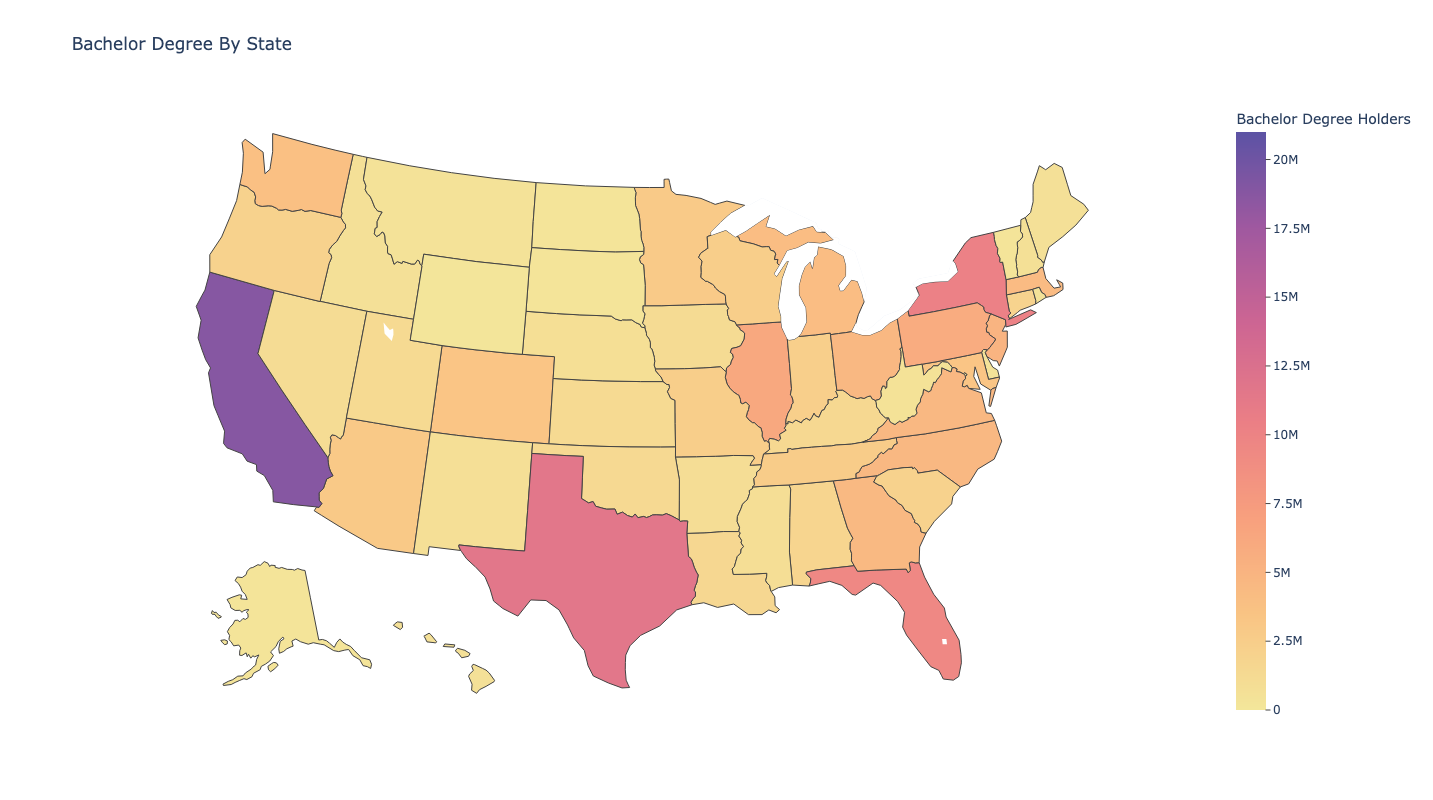

In [7]:
mygraphtitle = 'Bachelor Degree By State'
mycolorbartitle = "Bachelor Degree Holders"
mycolorscale = 'Sunset' # Note: The error message will list possible color scales.
bar_max = 18900000
factor = 0.9
data=go.Choropleth(
    locations=sex_total['Code'], # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in `locations`
    z = sex_total['Bachelor\'s Degree Holders'] , # Data to be color-coded
    colorscale = mycolorscale,
    zmin=0,
    zmax= bar_max/factor,
    colorbar_title = mycolorbartitle,
    colorbar=dict(
            tickvals = [0,2500000, 5000000,7500000,10000000,12500000,15000000,17500000,20000000],
            ticks='outside'
    )
)
fig = go.Figure(data)
fig.update_layout(
    title_text = mygraphtitle,
    geo_scope='usa',
    width=1200,
    height=800
)
fig

In [24]:
sex = pd.DataFrame(df,columns = ['Code','Sex','Bachelor\'s Degree Holders'])
sex['Bachelor\'s Degree Holders'] = sex['Bachelor\'s Degree Holders'].replace(",","", regex=True).astype(float)
total = sex[sex['Sex']=='Total'].groupby(['Code'],as_index = False).sum().rename(columns={'Bachelor\'s Degree Holders':"Total"})
female = sex[sex['Sex']=='Female'].groupby(['Code'],as_index = False).sum().rename(columns={'Bachelor\'s Degree Holders':"Female"})
female_rate = pd.DataFrame()
female_rate['Code'] = sex['Code']
female_rate = pd.merge(female,total,on=['Code'])
#z = female_rate1.groupby('Code')
#z=female_rate[female_rate['Sex']=='Female']
female_rate['Female Rate'] = female_rate['Female']/female_rate['Total']

female_rate

,Code,Female,Total,Female Rate
0,AK,160674.0,292314.0,0.549662
1,AL,959478.0,1770714.0,0.541859
2,AR,520166.0,950734.0,0.547120
3,AZ,1536138.0,2984316.0,0.514737
4,CA,9737040.0,18856968.0,0.516363
5,CO,1733340.0,3391204.0,0.511128
6,CT,1054996.0,1989096.0,0.530390
7,DC,315510.0,602858.0,0.523357
8,DE,243910.0,456398.0,0.534424
9,FL,4971604.0,9507274.0,0.522926


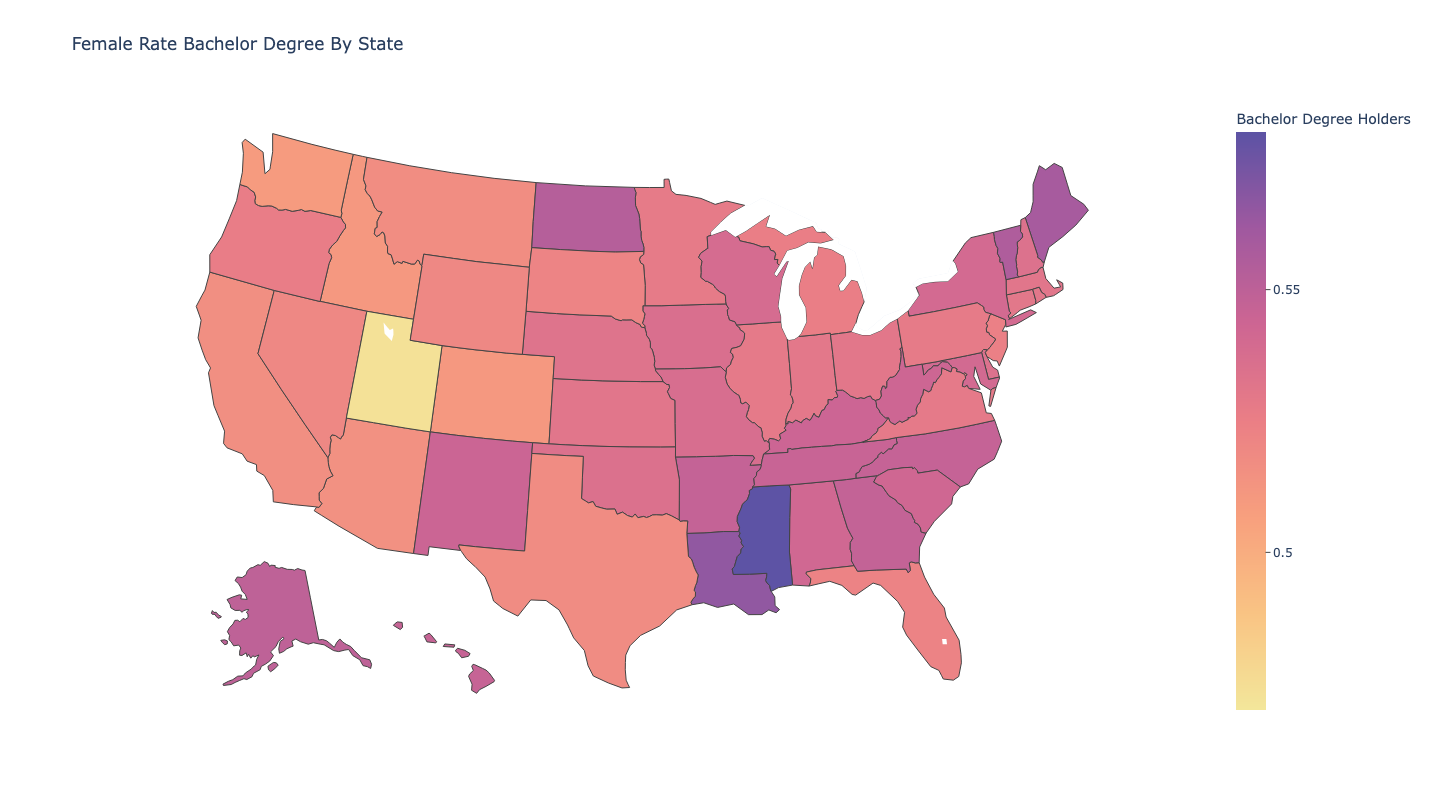

In [33]:
mygraphtitle = 'Female Rate for Bachelor Degree By State'
mycolorbartitle = "Bachelor Degree Holders"
mycolorscale = 'Sunset' # Note: The error message will list possible color scales.
bar_max = 0.58
factor = 1
data=go.Choropleth(
    locations=female_rate['Code'], # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in `locations`
    z = female_rate['Female Rate'] , # Data to be color-coded
    colorscale = mycolorscale,
    zmin=0.47,
    zmax= bar_max/factor,
    colorbar_title = mycolorbartitle,
    colorbar=dict(
            tickvals = [0.45,0.5,0.55,0.6],
            ticks='outside'
    )
)
fig = go.Figure(data)
fig.update_layout(
    title_text = mygraphtitle,
    geo_scope='usa',
    width=1200,
    height=800
)
fig

In [37]:
se = pd.DataFrame(df,columns = ['Code','Sex','Science and Engineering'])
se['Science and Engineering'] = se['Science and Engineering'].replace(",","", regex=True).astype(float)
total_se = se[se['Sex']=='Total'].groupby(['Code'],as_index = False).sum().rename(columns={'Science and Engineering':"Total"})
female_se = se[se['Sex']=='Female'].groupby(['Code'],as_index = False).sum().rename(columns={'Science and Engineering':"Female"})
female_rate_se = pd.DataFrame()
female_rate_se['Code'] = sex['Code']
female_rate_se = pd.merge(female_se,total_se,on=['Code'])
#z = female_rate1.groupby('Code')
#z=female_rate[female_rate['Sex']=='Female']
female_rate_se['Female Rate'] = female_rate['Female']/female_rate['Total']

female_rate_se

,Code,Female,Total,Female Rate
0,AK,52846.0,114750.0,0.460532
1,AL,208378.0,527110.0,0.395322
2,AR,109134.0,278006.0,0.392560
3,AZ,388892.0,1025436.0,0.379246
4,CA,3307464.0,7859122.0,0.420844
5,CO,543848.0,1325672.0,0.410243
6,CT,304308.0,722214.0,0.421354
7,DC,140560.0,292418.0,0.480682
8,DE,63836.0,151246.0,0.422067
9,FL,1220816.0,3041262.0,0.401418


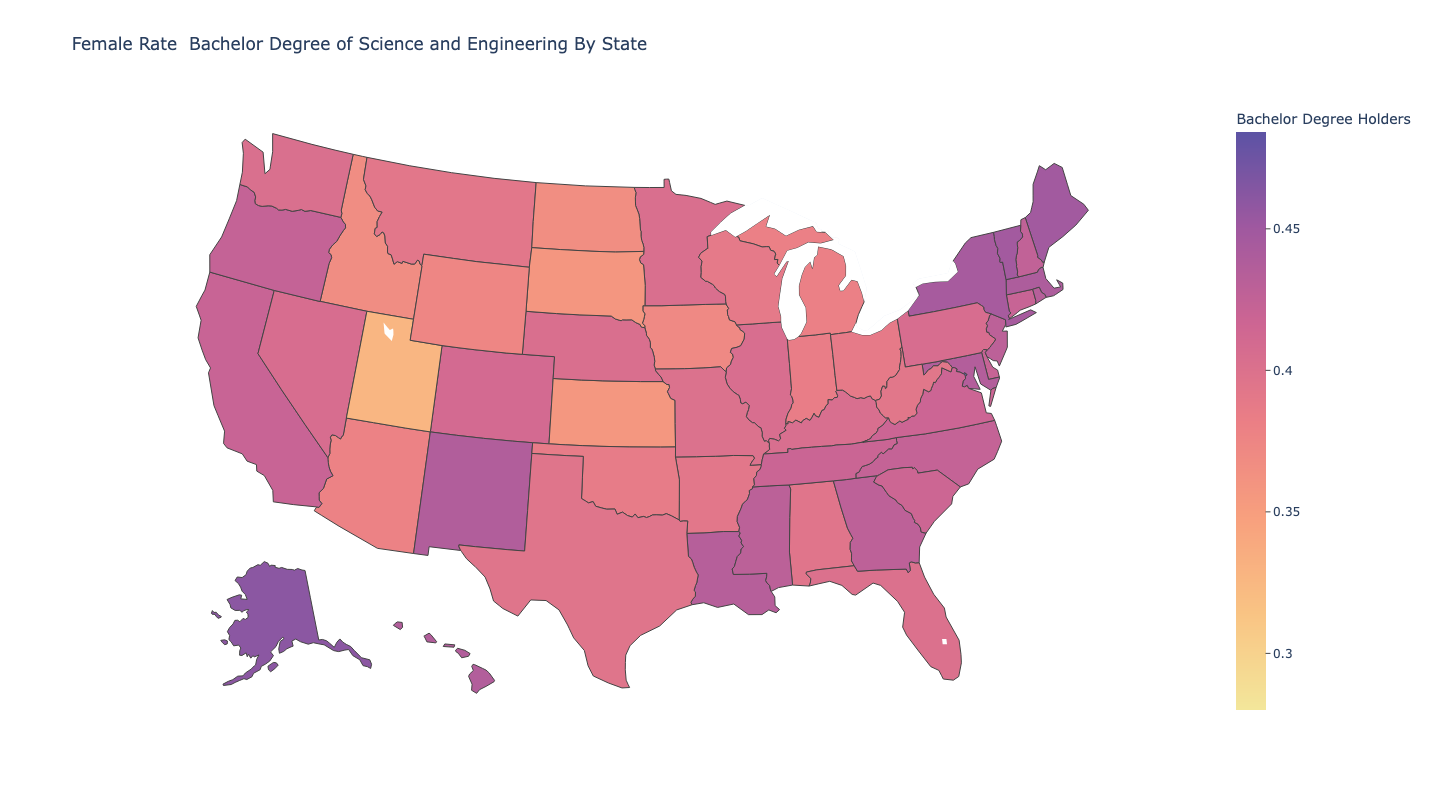

In [44]:
mygraphtitle = 'Female Rate  Bachelor Degree of Science and Engineering By State'
mycolorbartitle = "Bachelor Degree Holders"
mycolorscale = 'Sunset' # Note: The error message will list possible color scales.
bar_max = 0.46
factor = 0.95
data=go.Choropleth(
    locations=female_rate_se['Code'], # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in `locations`
    z = female_rate_se['Female Rate'] , # Data to be color-coded
    colorscale = mycolorscale,
    zmin=0.28,
    zmax= bar_max/factor,
    colorbar_title = mycolorbartitle,
    colorbar=dict(
            tickvals = [0.30,0.35,0.40,0.45],
            ticks='outside'
    )
)
fig = go.Figure(data)
fig.update_layout(
    title_text = mygraphtitle,
    geo_scope='usa',
    width=1200,
    height=800
)
fig